In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0

import pandas as pd
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import sys 
sys.path.append(r'../')
from evaluation.evaluation import get_pooled_aggregate_stats
from sklearn.model_selection import ParameterGrid
from scipy.stats import wilcoxon
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kendalltau, spearmanr

In [4]:
SAVE_DIR = r'/home/scratch/mgoswami/'
exp = 'reliability' 
dataset = 'smd' # 'anomaly_archive' 'smd'

with open(os.path.join(SAVE_DIR, f'Experiments_{exp}', f"aggregate_stats_{dataset}.pkl"), 'rb') as f:
    aggregate_stats = pkl.load(f)

In [5]:
aggregate_stats.keys()

dict_keys(['NASA Data', 'Gait', 'Respiration Rate (RESP)', 'Acceleration Sensor Data', 'Air Temperature', 'Atrial Blood Pressure (ABP)', 'Electrocardiogram (ECG) Arrhythmia', 'Insect Electrical Penetration Graph (EPG)', 'Power Demand', 'SMD'])

In [6]:
aggregate_stats['NASA'] = aggregate_stats.pop('NASA Data')
aggregate_stats['Gait'] = aggregate_stats.pop('Gait')
aggregate_stats['RESP'] = aggregate_stats.pop('Respiration Rate (RESP)')
aggregate_stats['Acceleration'] = aggregate_stats.pop('Acceleration Sensor Data')
aggregate_stats['Temperature'] = aggregate_stats.pop('Air Temperature')
aggregate_stats['ABP'] = aggregate_stats.pop('Atrial Blood Pressure (ABP)')
aggregate_stats['ECG'] = aggregate_stats.pop('Electrocardiogram (ECG) Arrhythmia')
aggregate_stats['EPG'] = aggregate_stats.pop('Insect Electrical Penetration Graph (EPG)')
aggregate_stats['Power'] = aggregate_stats.pop('Power Demand')
aggregate_stats['SMD'] = aggregate_stats.pop('SMD')

## Pooled correlation analysis between VUS-ROC, adjusted best $F_1$ and adjusted PR-AUC

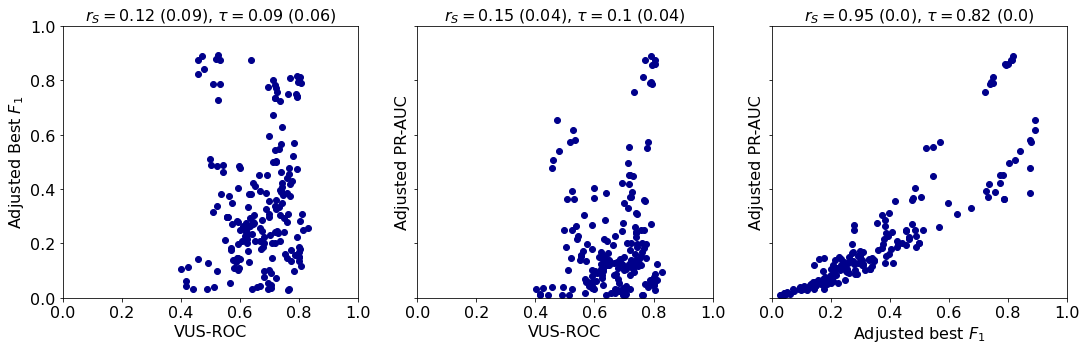

In [7]:
measures = []
for i, dataset in enumerate(aggregate_stats.keys()):
    measures.append(aggregate_stats[dataset]['models_performance_matrix'].loc[:, ['PR-AUC', 'Best F-1', 'VUS']])
measures = pd.concat(measures, axis=0)

# measures = aggregate_stats[dataset]['models_performance_matrix'].loc[:, ['PR-AUC', 'Best F-1', 'VUS']]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

axes[0].scatter(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'], c='darkblue')
spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'])
kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'])
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('VUS-ROC', fontsize=16)
axes[0].set_ylabel(r'Adjusted Best $F_1$', fontsize=16)
axes[0].set_title(r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16)
axes[0].tick_params(labelsize=16)

axes[1].scatter(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'], c='darkblue')
spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'])
kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'])
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('VUS-ROC', fontsize=16)
axes[1].set_ylabel(r'Adjusted PR-AUC', fontsize=16)
axes[1].set_title(r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16)
axes[1].tick_params(labelsize=16)

axes[2].scatter(measures.loc[:, 'Best F-1'], measures.loc[:, 'PR-AUC'], c='darkblue')
spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'PR-AUC'], measures.loc[:, 'Best F-1'])
kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'PR-AUC'], measures.loc[:, 'Best F-1'])
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)
axes[2].set_xlabel(r'Adjusted best $F_1$', fontsize=16)
axes[2].set_ylabel('Adjusted PR-AUC', fontsize=16)
axes[2].set_title(r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16)
axes[2].tick_params(labelsize=16)

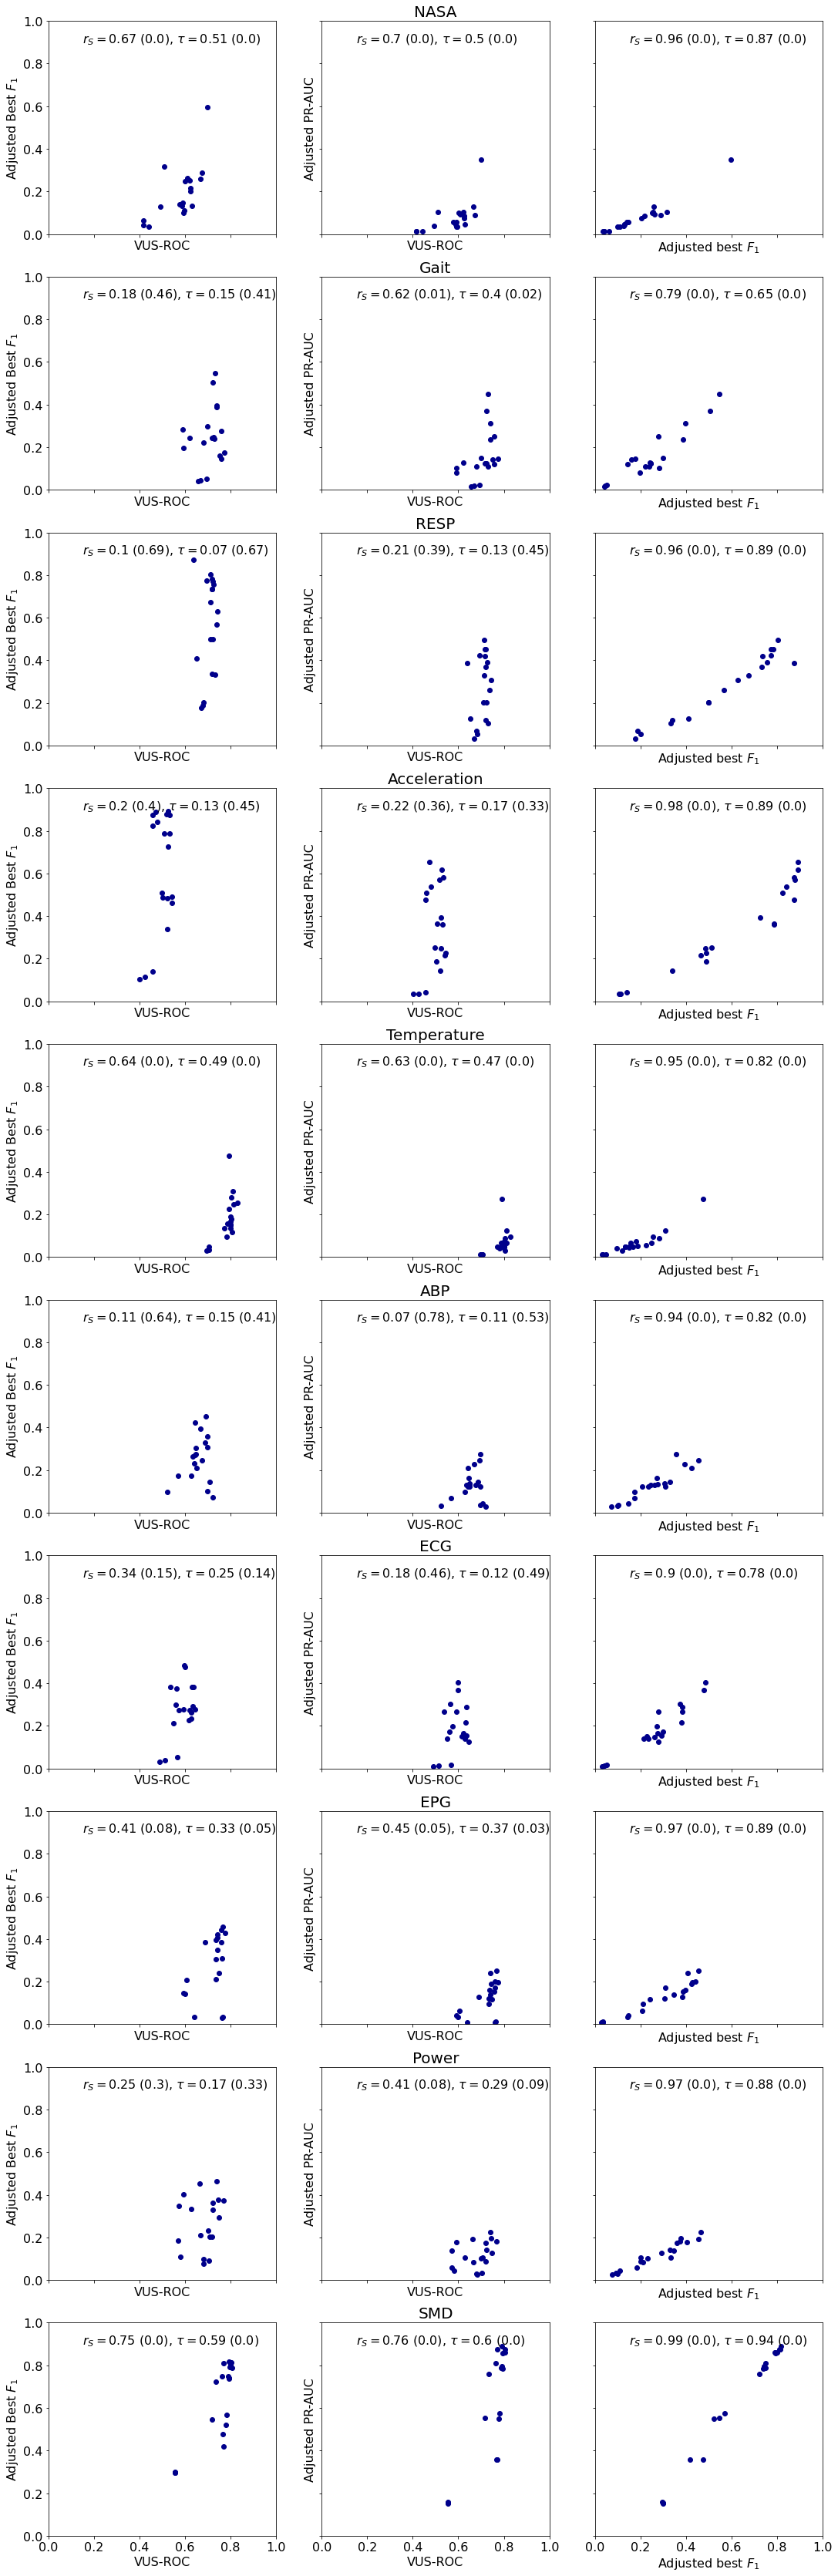

In [8]:
from scipy.stats import kendalltau, spearmanr


fig, axes = plt.subplots(len(aggregate_stats.keys()), 3, figsize=(18, 60), sharey=True, sharex=True)

for i, dataset in enumerate(aggregate_stats.keys()):
    measures = aggregate_stats[dataset]['models_performance_matrix'].loc[:, ['PR-AUC', 'Best F-1', 'VUS']]
        
    axes[i, 0].scatter(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'], c='darkblue')
    spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'])
    kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'])
    axes[i, 0].set_xlim(0, 1)
    axes[i, 0].set_ylim(0, 1)
    axes[i, 0].set_xlabel('VUS-ROC', fontsize=16)
    axes[i, 0].set_ylabel(r'Adjusted Best $F_1$', fontsize=16)
    axes[i, 0].text(0.15, 0.90, s=r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16, color='k')
    axes[i, 0].tick_params(labelsize=16)

    axes[i, 1].scatter(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'], c='darkblue')
    spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'])
    kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'VUS'], measures.loc[:, 'PR-AUC'])
    axes[i, 1].set_xlim(0, 1)
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].set_xlabel('VUS-ROC', fontsize=16)
    axes[i, 1].set_ylabel(r'Adjusted PR-AUC', fontsize=16)
    axes[i, 1].set_title(dataset, fontsize=20)
    axes[i, 1].text(0.15, 0.90, s=r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16, color='k')
    axes[i, 1].tick_params(labelsize=16)

    axes[i, 2].scatter(measures.loc[:, 'Best F-1'], measures.loc[:, 'PR-AUC'], c='darkblue')
    spearman_corr, spearman_pval = spearmanr(measures.loc[:, 'PR-AUC'], measures.loc[:, 'Best F-1'])
    kendall_corr, kendall_pval = kendalltau(measures.loc[:, 'PR-AUC'], measures.loc[:, 'Best F-1'])
    axes[i, 2].set_xlim(0, 1)
    axes[i, 2].set_ylim(0, 1)
    axes[i, 2].set_xlabel(r'Adjusted best $F_1$', fontsize=16)
    axes[i, 2].text(0.15, 0.90, s=r'$r_S = $' + f'{np.around(spearman_corr, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_corr, 2)} ({np.around(kendall_pval, 2)})', fontsize=16, color='k')
    axes[i, 2].tick_params(labelsize=16)

plt.savefig(os.path.join(SAVE_DIR, f"correlation_stats_Nov16.png"), bbox_inches='tight')    

Pooled correlation analysis may not work because we are estiamting the maximum sliding window length (a parameter that VUS-ROC depends on) automatically. The periodicity of different time-series are vastly different, hence estimating the sliding window automatically may not work.

## Correlation analysis between VUS-ROC and adjusted best $F_1$ for each time-series

In [21]:
### Load the ranking object
DATASET = 'anomaly_archive'
EXPERIMENT_DATE = 'Oct29'
SAVE_DIR = f'/home/scratch/mgoswami/Experiments_{EXPERIMENT_DATE}/results'

with open(os.path.join(SAVE_DIR, 'correlation.pkl'), 'rb') as f: 
    correlations = pkl.load(f)
print(f'Processed datasets: {len(correlations)}')

Processed datasets: 250


### Compute Spearman $r$ between adjusted best $F_1$ and VUS-ROC

In [22]:
positively_correlated = 0
negatively_correlated = 0

negatively_correlated_entities = []
for i in range(len(correlations)):
    spearman_r = correlations[i]['spearman_correlation']
    spearman_pval = correlations[i]['spearman_pvalue']
    
    if (spearman_r is not None) and (spearman_pval < 0.05):
        if spearman_r > 0:
            positively_correlated += 1
        else:
            negatively_correlated += 1
            negatively_correlated_entities.append([i, correlations[i]['entity']])

print(f'Positively correlated datasets: {positively_correlated}, negatively correlated datasets: {negatively_correlated}')

Positively correlated datasets: 78, negatively correlated datasets: 23


### Compute Kendall $\tau$ between adjusted best $F_1$ and VUS-ROC

In [24]:
positively_correlated = 0
negatively_correlated = 0
negatively_correlated_entities = []

for i in range(len(correlations)):
    kendall_tau = correlations[i]['kendall_correlation']
    kendall_pval = correlations[i]['kendall_pvalue']
    
    if (kendall_tau is not None) and (kendall_pval < 0.05):
        # print('Correlation:', np.around(kendall_tau, 3), 'p-value:', np.around(kendall_pval, 3))
    
        if kendall_tau > 0:
            positively_correlated += 1
        else:
            negatively_correlated += 1
            negatively_correlated_entities.append([i, correlations[i]['entity']])

print(f'Positively correlated datasets: {positively_correlated}, negatively correlated datasets: {negatively_correlated}')

Positively correlated datasets: 80, negatively correlated datasets: 23


In [25]:
low_dispersion = 0
neg_corr_ent_with_high_dis = []
dispersion_threshold = 0.2
dispersion = []

for i, ent in negatively_correlated_entities: 
    measures = correlations[i]['model_performance_matrix']
    dispersion_f1 = np.quantile(measures.loc[:, 'Best F-1'], 0.75) - np.quantile(measures.loc[:, 'Best F-1'], 0.25)
    dispersion_vus = np.quantile(measures.loc[:, 'VUS'], 0.75) - np.quantile(measures.loc[:, 'VUS'], 0.25)
    if (dispersion_f1 < dispersion_threshold) or (dispersion_vus < dispersion_threshold):
        low_dispersion = low_dispersion + 1
    else: 
        neg_corr_ent_with_high_dis.append(i) 
    
    dispersion.append(min(dispersion_f1, dispersion_vus)) 

print(f'Number of low dispersion datasets: {low_dispersion} our of {len(negatively_correlated_entities)}' )

Number of low dispersion datasets: 22 our of 23


In [29]:
negatively_correlated_entities

[[23, '109_UCR_Anomaly_1sddb40'],
 [40, '149_UCR_Anomaly_Lab2Cmac011215EPG5'],
 [43, '213_UCR_Anomaly_STAFFIIIDatabase'],
 [81, '167_UCR_Anomaly_gait1'],
 [84, '088_UCR_Anomaly_DISTORTEDsel840mECG2'],
 [97, '179_UCR_Anomaly_ltstdbs30791AS'],
 [101, '012_UCR_Anomaly_DISTORTEDECG2'],
 [110, '119_UCR_Anomaly_ECG1'],
 [112, '100_UCR_Anomaly_NOISELab2Cmac011215EPG1'],
 [120, '061_UCR_Anomaly_DISTORTEDgait3'],
 [131, '001_UCR_Anomaly_DISTORTED1sddb40'],
 [141, '227_UCR_Anomaly_mit14134longtermecg'],
 [153, '214_UCR_Anomaly_STAFFIIIDatabase'],
 [157, '037_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG1'],
 [160, '216_UCR_Anomaly_STAFFIIIDatabase'],
 [173, '004_UCR_Anomaly_DISTORTEDBIDMC1'],
 [186, '058_UCR_Anomaly_DISTORTEDapneaecg'],
 [194, '145_UCR_Anomaly_Lab2Cmac011215EPG1'],
 [219, '112_UCR_Anomaly_BIDMC1'],
 [226, '011_UCR_Anomaly_DISTORTEDECG1'],
 [229, '120_UCR_Anomaly_ECG2'],
 [232, '237_UCR_Anomaly_mit14157longtermecg'],
 [235, '093_UCR_Anomaly_NOISE1sddb40']]

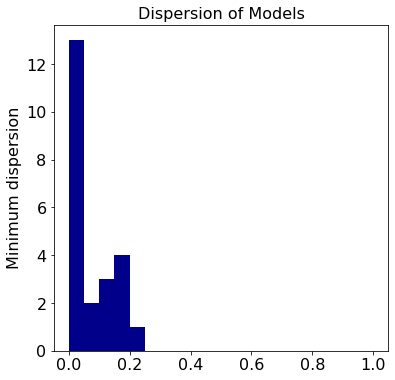

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.hist(dispersion, bins=20, range=(0,1), color='darkblue')
axes.set_ylabel(r'Minimum dispersion', fontsize=16)
axes.set_title(f'Dispersion of Models', fontsize=16)
axes.tick_params(labelsize=16)

### Look at the scatter plot for a particular dataset

149_UCR_Anomaly_Lab2Cmac011215EPG5


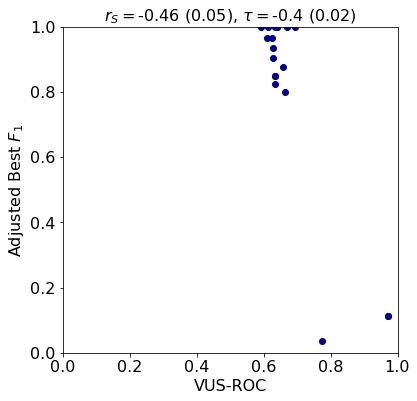

In [34]:
i = 40
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
entity = correlations[i]['entity']
print(entity)
measures = correlations[i]['model_performance_matrix']
spearman_r = correlations[i]['spearman_correlation']
spearman_pval = correlations[i]['spearman_pvalue']
kendall_tau = correlations[i]['kendall_correlation']
kendall_pval = correlations[i]['kendall_pvalue']
axes.scatter(measures.loc[:, 'VUS'], measures.loc[:, 'Best F-1'], c='darkblue') # 
axes.set_xlim(0, 1)
axes.set_ylim(0, 1)
axes.set_xlabel('VUS-ROC', fontsize=16)
axes.set_ylabel(r'Adjusted Best $F_1$', fontsize=16)
axes.set_title(r'$r_S = $' + f'{np.around(spearman_r, 2)} ({np.around(spearman_pval, 2)}), ' + r'$\tau = $' + f'{np.around(kendall_tau, 2)} ({np.around(kendall_pval, 2)})', fontsize=16)
axes.tick_params(labelsize=16)

### Does empirical influence identify bad models? 

In [11]:
datasets = aggregate_stats.keys()
n_measures = 5 # number of top and bottom models to average OR the difference between the top and nth measure
ei_sep_all_data = []

for dataset in datasets:     
    metrics = list(aggregate_stats[dataset]['reliability'].keys())
    # metrics_for_agg = 'SYNTHETIC_F1_noise', 'SYNTHETIC_F1_scale', 'SYNTHETIC_F1_cutoff', 'SYNTHETIC_F1_contextual', 'SYNTHETIC_F1_average'

    ei_separation = {}

    for metric in metrics:
        if metric in ['MAE', 'MSE', 'SMAPE', 'MAPE', 'CENTRALITY_2', 'CENTRALITY_4', 'CENTRALITY_6']:
            ascending=True
        else:
            ascending=False
        
        # Identify the n best and worst models
        evaluation_measure = aggregate_stats[dataset]['models_performance_matrix'].loc[:, ['Best F-1', metric]].sort_values(by=metric, axis=0, ascending=ascending)
        
        ## Average separation of top-n models from bottom n-models
        quality = evaluation_measure.iloc[:n_measures, 0].mean() # Performance of the best model
        # quality = evaluation_measure.iloc[:n_measures, 0].mean() - evaluation_measure.iloc[-n_measures:, 0].mean() # Separation between the best and worst model
               
        ei_separation[metric] = {'quality': quality, 'empirical_influence': aggregate_stats[dataset]['reliability'][metric]}

    ei_separation = pd.DataFrame(ei_separation).T
    ei_separation = ei_separation.sort_values(by='empirical_influence', axis=0, ascending=True)
    
    # print(ei_separation.iloc[:3, 0].mean() - ei_separation.loc[['CENTRALITY_2', 'CENTRALITY_4', 'CENTRALITY_6'], 'quality'].mean())
    # print(ei_separation.iloc[:3, 0].mean() - ei_separation.iloc[-3:, 0].mean())
    # print(ei_separation.iloc[:1, 0].mean() - ei_separation.iloc[-1:, 0].mean())
    print(dataset.upper()[:3], kendalltau(ei_separation.iloc[:, 0], ei_separation.iloc[:, 1], alternative='less'))
    # print(dataset.upper()[:3], spearmanr(ei_separation.iloc[:, 0], ei_separation.iloc[:, 1], alternative='less'))
    
    ei_sep_all_data.append(ei_separation)

ei_sep_all_data = pd.concat(ei_sep_all_data, axis=0)
print('ALL', kendalltau(ei_sep_all_data.iloc[:, 0], ei_sep_all_data.iloc[:, 1], alternative='less'))  

NAS KendalltauResult(correlation=-0.27715550194612, pvalue=0.06293706490074981)
GAI KendalltauResult(correlation=0.13333333333333333, pvalue=0.7711756040251332)
RES KendalltauResult(correlation=0.3165048290103597, pvalue=0.9548847981001493)
ACC KendalltauResult(correlation=-0.14865996682412308, pvalue=0.21104011666712974)
TEM KendalltauResult(correlation=-0.09091952763387234, pvalue=0.308957125444272)
ABP KendalltauResult(correlation=-0.37883136514113475, pvalue=0.018947942329595374)
ECG KendalltauResult(correlation=-0.3878579337200236, pvalue=0.016931921006570077)
EPG KendalltauResult(correlation=-0.35615259950124734, pvalue=0.025366640532629103)
POW KendalltauResult(correlation=0.11408906073737973, pvalue=0.7337000422719967)
SMD KendalltauResult(correlation=-0.5654411512896176, pvalue=0.0011646599200295686)
All datasets combined: KendalltauResult(correlation=-0.04199574240996979, pvalue=0.20896384283488345)


In [12]:
ei_separation

,quality,empirical_influence
CENTRALITY_4,0.098150,-3.705882
CENTRALITY_6,0.098150,-3.080882
SYNTHETIC_F1_cutoff,0.377206,-1.955882
CENTRALITY_2,0.076085,-1.705882
SYNTHETIC_F1_average,0.292599,-1.705882
SYNTHETIC_F1_noise,0.231935,-1.455882
LIKELIHOOD,0.231935,-0.893382
SYNTHETIC_F1_flip,0.231935,-0.393382
SYNTHETIC_F1_spikes,0.463817,-0.205882
SYNTHETIC_F1_contextual,0.231935,-0.143382
